<a href="https://colab.research.google.com/github/evarito/Supervised_Learning/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#First step is to: load and view dataset
import pandas as pd
Road = pd.read_csv('/content/Road.csv')
print("Shape of the dataset:", Road.shape)
Road.head()

Shape of the dataset: (59, 17)


,Time,Day_of_week,Road_surface_conditions,Light_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Casualty_severity,Accident_severity,Temperature (Celsius),Visibility (meters),Road_quality_index,Speed_limit (km/h),Distance_to_nearest_intersection (meters),Road_length (kilometers),Number_of_lanes,Accident_severity_score
0,08:00,Monday,Wet,Daylight,Rear-end,2,2,Minor Injury,Slight Injury,15,1000,0.6,60,50,5,2,1.2
1,13:30,Wednesday,Dry,Daylight,Side-swipe,1,1,Major Injury,Serious Injury,20,1200,0.8,50,100,10,3,2.5
2,17:45,Friday,Wet,Darkness,Head-on,2,3,Fatal,Fatal,10,800,0.5,70,200,15,4,5.0
3,09:15,Tuesday,Dry,Daylight,Rear-end,3,1,Minor Injury,Slight Injury,18,1500,0.7,40,150,8,2,1.8
4,16:20,Thursday,Wet,Darkness,Side-swipe,2,2,Major Injury,Serious Injury,12,900,0.4,60,80,7,3,3.3


In [2]:
#Second step is to: view the dependent and independent variables from the dataset
import pandas as pd
Road = pd.read_csv('/content/Road.csv')
data = Road.loc[:,['Number_of_casualties', 'Accident_severity_score']]
data.head(15)

,Number_of_casualties,Accident_severity_score
0,2,1.2
1,1,2.5
2,3,5.0
3,1,1.8
4,2,3.3
5,1,2.1
6,2,4.8
7,1,2.9
8,1,1.7
9,3,4.5


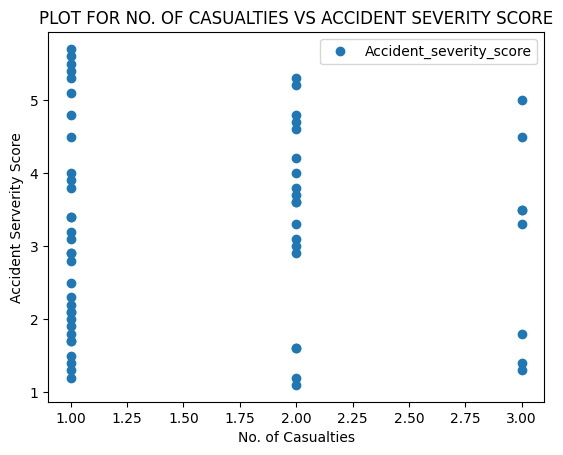

In [6]:
#Third step: visualize the change in the variables
import pandas as pd
import matplotlib.pyplot as plt
Road = pd.read_csv('/content/Road.csv')

Road.plot(x='Number_of_casualties', y='Accident_severity_score', style = 'o')
plt.xlabel('No. of Casualties')
plt.ylabel('Accident Serverity Score')
plt.title('PLOT FOR NO. OF CASUALTIES VS ACCIDENT SEVERITY SCORE')
plt.show()


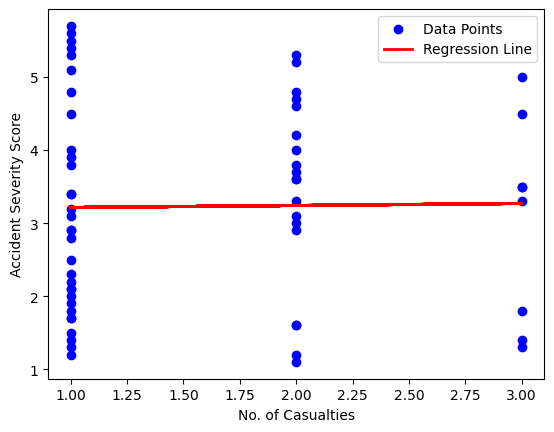

In [10]:
#Addition of a regression line
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
Road = pd.read_csv('/content/Road.csv')

#extraction of independent(x) and the dependent(y) variable
X = Road[['Number_of_casualties']]
y = Road['Accident_severity_score']

#create and fit a linear regression model
regressor = LinearRegression()
regressor.fit(X,y)

#plot the data points
plt.scatter(X, y, color = 'blue', label = 'Data Points')

#overlaying the regression line
plt.plot(X, regressor.predict(X), color = 'red', linewidth=2, label= 'Regression Line')
plt.xlabel('No. of Casualties')
plt.ylabel('Accident Severity Score')
plt.legend()
plt.show()

In [11]:
#Step 4 is to: Divide the data into independent and dependent variables
import pandas as pd
from sklearn.model_selection import train_test_split
Road = pd.read_csv('/content/Road.csv')
x = pd.DataFrame(Road['Number_of_casualties'])
y = pd.DataFrame(Road['Accident_severity_score'])

#step 5 is to: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print(Road.columns)

Index(['Time', 'Day_of_week', 'Road_surface_conditions', 'Light_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Casualty_severity', 'Accident_severity',
       'Temperature (Celsius)', 'Visibility (meters)', 'Road_quality_index',
       'Speed_limit (km/h)', 'Distance_to_nearest_intersection (meters)',
       'Road_length (kilometers)', 'Number_of_lanes',
       'Accident_severity_score'],
      dtype='object')


In [13]:
#Step 6 is to: Shape of the train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(47, 1)
(12, 1)
(47, 1)
(12, 1)


In [14]:
#Step 7 is to: Train the algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
#Step 8 is to: Retrieve the intercept
print(regressor.intercept_)


[3.00168067]


In [16]:
#Step 9 is to: retrieve the slope
print(regressor.coef_)

[[0.05361345]]


In [17]:
#Step 10 is to: Predict Values
y_pred = regressor.predict(X_test)
y_pred

array([[3.05529412],
       [3.16252101],
       [3.05529412],
       [3.10890756],
       [3.05529412],
       [3.10890756],
       [3.05529412],
       [3.10890756],
       [3.10890756],
       [3.05529412],
       [3.10890756],
       [3.05529412]])

In [18]:
#Step 11 is to: use actual values
y_test.head(15)

,Accident_severity_score
49,5.7
2,5.0
35,5.6
47,4.0
39,4.8
34,1.1
38,3.1
19,5.2
21,1.6
52,3.4


In [19]:
#Step 12 is to: Evaluate the algorithm
from sklearn import metrics
import numpy as np

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):",mae)
print("Mean Squared Error (MSE):",mse)
print("Root Mean Squared Error(RMSE):",rmse)


Mean Absolute Error (MAE): 1.5006162464985993
Mean Squared Error (MSE): 2.8547180519266515
Root Mean Squared Error(RMSE): 1.6895910901536655


In [20]:
#How to save the Linear Regression Model
import joblib
import pickle
from sklearn.linear_model import LinearRegression

#Train your linear regression model
model = LinearRegression()
model.fit(x, y)

joblib.dump(model, 'linear_regression_model.pkl')
with open('linear_regression_model.pkl', 'wb') as file: pickle.dump(model, file)




In [5]:
#define the dataset based on the provided data
data = [
    ["08:40", "Monday","wet", "Daylight", "Rear-end", 2,2, "Minor Injury", "Slight Injury", 15, 1000, 0.6, 60, 50, 5, 2, 1.2],
    ["03:10", "Saturday","dry", "Darkness", "Side-sweep", 1,1, "Fatal ", "Serious Injury", 10, 1589, 0.3, 50, 70, 9, 5, 2.2],
    ["17:57", "Tuesday","wet", "Daylight", "Head-on", 3,2, "Fatal", "Fatal Injury", 14, 1299, 0.9, 20, 10, 9, 2, 1.2],
    ["13:33", "Sunday","dry", "Daylight", "Head-on", 2,2, "Minor Injury", "Slight Injury", 8, 1080, 0.1, 10, 70, 9, 2, 6.2],
    ["03:25", "Wednesday","wet", "Darkness", "Side-sweep", 3,2, "Minor Injury", "Serious Injury", 5, 1908, 0.6, 60, 40, 5, 2, 2.9],
    ["18:47", "Friday","wet", "Daylight", "Head-on", 1,1, "Fatal", "Fatal Injury", 7, 700, 0.4, 20, 30, 5, 2, 3.9],
    ["16:11", "Monday","dry", "Darkness", "Rear-end", 3,1, "Minor Injury", "Slight Injury", 5, 100, 0.7, 50, 10, 5, 6, 1.6]
]

#converting the list to a set to remove duplicates and then convert it back to a list
data = list(set(tuple(record) for record in data))


# Define a function to simulate testing based on the provided data
def test_model(data):
  for record in data:
    time = record[0]
    day_of_week = record[1]
    road_surface_condition = record[2]
    light_conditions = record[3]
    type_of_collision = record[4]
    num_vehicles_involved = record[5]
    num_casualties = record[6]
    casualty_severity = record[7]
    accident_severity = record[8]
    temperature = record[9]
    visibility = record[10]
    road_quality_index = record[11]
    speed_limit = record[12]
    distance_to_nearest_intersection =record[13]
    road_length = record[14]
    num_of_lanes = record[15]

    print(f"Model output for record: {record}")

#calling function to test the model with the provided data
test_model(data)

Model output for record: ('03:25', 'Wednesday', 'wet', 'Darkness', 'Side-sweep', 3, 2, 'Minor Injury', 'Serious Injury', 5, 1908, 0.6, 60, 40, 5, 2, 2.9)
Model output for record: ('03:10', 'Saturday', 'dry', 'Darkness', 'Side-sweep', 1, 1, 'Fatal ', 'Serious Injury', 10, 1589, 0.3, 50, 70, 9, 5, 2.2)
Model output for record: ('16:11', 'Monday', 'dry', 'Darkness', 'Rear-end', 3, 1, 'Minor Injury', 'Slight Injury', 5, 100, 0.7, 50, 10, 5, 6, 1.6)
Model output for record: ('18:47', 'Friday', 'wet', 'Daylight', 'Head-on', 1, 1, 'Fatal', 'Fatal Injury', 7, 700, 0.4, 20, 30, 5, 2, 3.9)
Model output for record: ('13:33', 'Sunday', 'dry', 'Daylight', 'Head-on', 2, 2, 'Minor Injury', 'Slight Injury', 8, 1080, 0.1, 10, 70, 9, 2, 6.2)
Model output for record: ('17:57', 'Tuesday', 'wet', 'Daylight', 'Head-on', 3, 2, 'Fatal', 'Fatal Injury', 14, 1299, 0.9, 20, 10, 9, 2, 1.2)
Model output for record: ('08:40', 'Monday', 'wet', 'Daylight', 'Rear-end', 2, 2, 'Minor Injury', 'Slight Injury', 15, 1000, 

In [6]:
print(data)

[('03:25', 'Wednesday', 'wet', 'Darkness', 'Side-sweep', 3, 2, 'Minor Injury', 'Serious Injury', 5, 1908, 0.6, 60, 40, 5, 2, 2.9), ('03:10', 'Saturday', 'dry', 'Darkness', 'Side-sweep', 1, 1, 'Fatal ', 'Serious Injury', 10, 1589, 0.3, 50, 70, 9, 5, 2.2), ('16:11', 'Monday', 'dry', 'Darkness', 'Rear-end', 3, 1, 'Minor Injury', 'Slight Injury', 5, 100, 0.7, 50, 10, 5, 6, 1.6), ('18:47', 'Friday', 'wet', 'Daylight', 'Head-on', 1, 1, 'Fatal', 'Fatal Injury', 7, 700, 0.4, 20, 30, 5, 2, 3.9), ('13:33', 'Sunday', 'dry', 'Daylight', 'Head-on', 2, 2, 'Minor Injury', 'Slight Injury', 8, 1080, 0.1, 10, 70, 9, 2, 6.2), ('17:57', 'Tuesday', 'wet', 'Daylight', 'Head-on', 3, 2, 'Fatal', 'Fatal Injury', 14, 1299, 0.9, 20, 10, 9, 2, 1.2), ('08:40', 'Monday', 'wet', 'Daylight', 'Rear-end', 2, 2, 'Minor Injury', 'Slight Injury', 15, 1000, 0.6, 60, 50, 5, 2, 1.2)]
